## Tutorial 1 ##

### Setting up Python ###

The IDE (Integrated Development Environment) I'm using is called VSCode. It's useful because there are some features that are integrated into the GUI (such as git integration).

However, it is not necessary for the purposes of this course. The majority of the work we'll be doing will be in Python, either in a .py script or as a .ipynb. You are free to use any other IDEs you're comfortable with, and also in either format. If you're more comfortable with other language, such as R or SAS, feel free to use that as well. However, the course will be delivered only in python.

There's plenty of tutorials about how to get Python running on your machine (if you don't already have it installed). But the gist of it would be:
* Install python
    * You can do so via this link here https://www.python.org/
        
* Install VSCode/any other IDEs
* Link the 2 together (depending on your IDE it could be done a couple different ways.)
    * Usually it's some form of (select an interpreter).

Don't hestitae to contact me or Terry about it if you're having issues setting it up.

### Installing Packages ###

In Python, many of the functions you will use are not going to be built in functions. Base python is quite limited in its functionality (but still extremely useful!).

As such, many custom functions have been written by many smart people to extend the functionality of Python. To use these functions which are bundled in packages, we need to first install these packages.

Here, I will install a package that you might use later in your assignment: pyportfolioopt

In [ ]:
!pip install PyPortfolioOpt

  Using cached pyportfolioopt-1.5.5-py3-none-any.whl (61 kB)
  Using cached cvxpy-1.4.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (8.8 kB)
  Using cached osqp-0.6.3.tar.gz (228 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached qdldl-0.1.7.post0-cp311-cp311-macosx_13_0_arm64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB

Be sure to let me know if you're having installation issues with any of the packages!

We can now use these packages later on in our code.

### Plotting ###

Python natively does not support plotting, as such packages are used. There are 3 common packages:
* matplotlib - the oldest and most established package, although potentially not the friendliest to use or the prettiest.
* seaborn - a package with potentially prettier graphs and has some nice features.
* plotly - the newest of the 3, with more in-built features than the other 2.

In our course, it really doesn't matter which of the 3 you pick. They fundamentally work similarly, and is not hard to figure out how to translate between the 3 (unless you're doing some very complicated plotting).

Below I will use matplotlib as a demo.

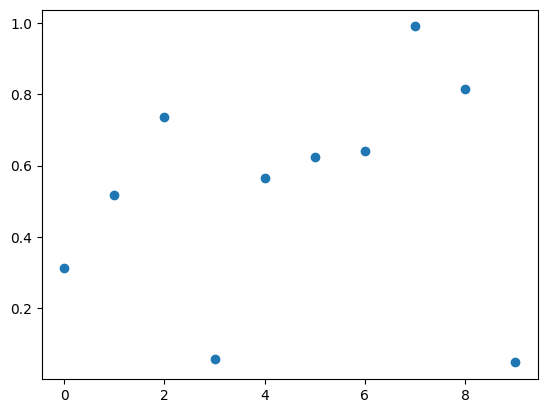

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# define x values. Here x_val is an array from 0 to 9 (i.e. 10 values)
x_val = np.array(range(0,10))

# define y values. Here y_val is an array that has random y_values.
y_val = np.random.rand(1,10)

plt.scatter(x_val, y_val)
plt.show()

As with any established packages in Python, there are documentations online that will be incredibly useful to you as you try to figure out how to use the functions.

For example, for the scatter function I used above, this is the corresponding documentation:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Reading through it would help you troubleshoot potential issues you may have. Let me know if you have any issues parsing through them, as they can get a little technical!

### A worked example ###

We now can do an example from one of the lectures. We will look at the 3 risky assets portfolio optimization problem from the Week 1 slides (slide 20-23), with results similar to the Excel version you might have gone over.

In [3]:
import pandas as pd
from scipy.optimize import minimize
# First, we encode the asset data into a dataframe
asset_data = pd.DataFrame(columns= ['Apple', 'Microsoft', 'HP'])
asset_data.loc[0] = [0.20,0.12,0.15]

cov_mat = [[0.09, 0.045, 0.05],
           [0.045, 0.07, 0.04],
           [0.05, 0.04, 0.06]]

mean_returns = asset_data.loc[0]
r_low = mean_returns.min()
r_high = mean_returns.max()
delta_r = (3*r_high - r_low/3)/10
num_assets= 3
expected_returns = np.arange(r_low, r_high, delta_r)

expected_returns

array([0.12 , 0.176])

In [ ]:
def minimum_variance_portfolio(returns, expected_return=None):
    init_guess = np.ones(num_assets) / num_assets

    # get portfolio volaitity by multiplying weights to covariance matrix
    def portfolio_volatility(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    # get portfolio returns by multiplying weights to mean_returns
    def portfolio_return(weights, mean_returns):
        return np.dot(weights.T, mean_returns)

    if expected_return is None:
        constraints = [{"type": "eq", "fun": lambda x: np.sum(x) - 1}]
    else:
        constraints = [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
                       {"type": "eq", "fun": lambda x: portfolio_return(x, mean_returns) - expected_return}]
    bounds = [(-10000000000, 100000000000) for i in range(num_assets)]
                # there're no bounds in weights, set to arbitrarily large numbers

    # encoding the linear program depicted in Slide 22
    result = minimize(fun=portfolio_volatility,
                        x0=init_guess,
                        args=(cov_mat,),
                        method="SLSQP",
                        constraints=constraints,
                        bounds=bounds)

    # set variables to output
    w_min_var = result.x
    ret_min_var = np.sum(mean_returns * w_min_var)
    std_min_var = result.fun
    return w_min_var, ret_min_var, std_min_var

# define weights, standard dev and returns for mininimum variance portfolio
w_gmv, ret_gmv, std_gmv = minimum_variance_portfolio([0.20,0.12,0.15])
print(w_gmv)
print(std_gmv)
print(ret_gmv)

portfolios = []
for r in expected_returns:
    w, ret, std = minimum_variance_portfolio(mean_returns, r)
    portfolios.append((w, ret, std))


[0.08790413 0.37362924 0.53846663]
0.05164835165124748
0.14318632902668188
(array([-0.23023255,  0.61627909,  0.61395346]), 0.11999999996547017, 0.05733720931926931)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


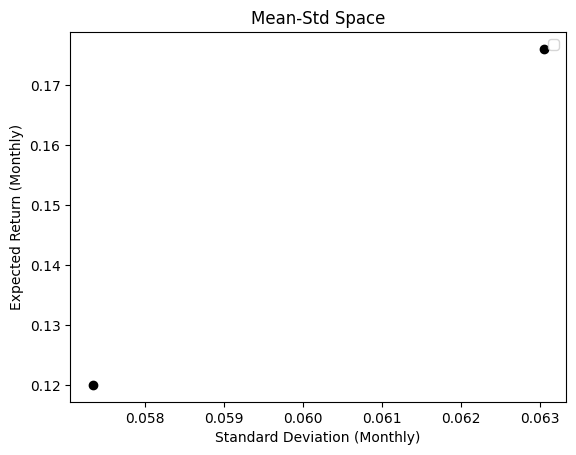

In [ ]:
# plotting the results
plt.scatter([p[2] for p in portfolios], [p[1] for p in portfolios], c='black')
plt.title('Mean-Std Space')
plt.xlabel('Standard Deviation (Monthly)')
plt.ylabel('Expected Return (Monthly)')
plt.legend()
plt.show()

array([0.12 , 0.176])